# Exploration des données de consommation de la ville de Seattle

## Sommaire
    
### 1. Chargement des données
    1.1 Chargement des données de 2015
    1.2 Chargement des données de 2016
### 2. Concaténation des deux jeux de données
### 3. Nettoyage des données
    3.1 Sélection des variables pertinentes
    3.2 Imputation des valeurs manquantes
    3.3 Filtrage des valeurs aberrantes 
    3.4 Traitement des variables catégorielles
### 4. Création de variables
### 5. Exploration des données
    5.1 Analyse univariée
        5.1.1 Analyse des variables cibles
        5.1.2 Analyse des features
    5.2 Analyse bivariée

In [56]:
# Import des librairies utiles à notre étude
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.dummy import DummyClassifier, DummyRegressor
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score, cross_validate, train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeRegressor
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, StandardScaler
from sklearn.svm import SVC
from sklearn.preprocessing import RobustScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from scipy import stats
from scipy.stats import norm, skew

## 1. Chargement des données

On charge les relevés des années 2015 et 2016

In [2]:
pd.set_option('display.max_row',80)
pd.set_option('display.max_column', 200)

dataset = pd.read_csv('seattle.csv')
dataset2 = pd.read_csv('2016-building-energy-benchmarking.csv')


Source : https://www.kaggle.com/city-of-seattle/sea-building-energy-benchmarking

In [3]:
# Aperçu des données de consommations de l'année 2015
dataset.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,TaxParcelIdentificationNumber,Location,CouncilDistrictCode,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),OtherFuelUse(kBtu),GHGEmissions(MetricTonsCO2e),GHGEmissionsIntensity(kgCO2e/ft2),DefaultData,Comment,ComplianceStatus,Outlier,2010 Census Tracts,Seattle Police Department Micro Community Policing Plan Areas,City Council Districts,SPD Beats,Zip Codes
0,1,2015,NonResidential,Hotel,MAYFLOWER PARK HOTEL,659000030,"{'latitude': '47.61219025', 'longitude': '-122...",7,DOWNTOWN,1927,1,12.0,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,65.0,78.9,80.3,173.5,175.1,6981428.0,7097539.0,2023032.0,1080307.0,3686160.0,12724.0,1272388.0,0.0,249.43,2.64,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
1,2,2015,NonResidential,Hotel,PARAMOUNT HOTEL,659000220,"{'latitude': '47.61310583', 'longitude': '-122...",7,DOWNTOWN,1996,1,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,51.0,94.4,99.0,191.3,195.2,8354235.0,8765788.0,0.0,1144563.0,3905411.0,44490.0,4448985.0,0.0,263.51,2.38,No,NaN,Compliant,NaN,NaN,14.0,NaN,31.0,18081
2,3,2015,NonResidential,Hotel,WESTIN HOTEL,659000475,"{'latitude': '47.61334897', 'longitude': '-122...",7,DOWNTOWN,1969,1,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",Hotel,757243.0,Parking,100000.0,Swimming Pool,0.0,NaN,18.0,96.6,99.7,242.7,246.5,73130656.0,75506272.0,19660404.0,14583930.0,49762435.0,37099.0,3709900.0,0.0,2061.48,1.92,Yes,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,18081
3,5,2015,NonResidential,Hotel,HOTEL MAX,659000640,"{'latitude': '47.61421585', 'longitude': '-122...",7,DOWNTOWN,1926,1,10.0,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,1.0,460.4,462.5,636.3,643.2,28229320.0,28363444.0,23458518.0,811521.0,2769023.0,20019.0,2001894.0,0.0,1936.34,31.38,No,NaN,Compliant,High Outlier,NaN,56.0,NaN,31.0,18081
4,8,2015,NonResidential,Hotel,WARWICK SEATTLE HOTEL,659000970,"{'latitude': '47.6137544', 'longitude': '-122....",7,DOWNTOWN,1980,1,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,67.0,120.1,122.1,228.8,227.1,14829099.0,15078243.0,0.0,1777841.0,6066245.0,87631.0,8763105.0,0.0,507.70,4.02,No,NaN,Compliant,NaN,NaN,56.0,NaN,31.0,19576


In [4]:
# Aperçu des données de consommation de l'année 2016
dataset2.head(5)

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity
0,1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7226362.5,7456910.0,2003882.00,1.156514e+06,3946027.0,12764.52930,1276453.0,False,NaN,Compliant,NaN,249.98,2.83
1,2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8387933.0,8664479.0,0.00,9.504252e+05,3242851.0,51450.81641,5145082.0,False,NaN,Compliant,NaN,295.86,2.86
2,3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,72587024.0,73937112.0,21566554.00,1.451544e+07,49526664.0,14938.00000,1493800.0,False,NaN,Compliant,NaN,2089.28,2.19
3,5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6794584.0,6946800.5,2214446.25,8.115253e+05,2768924.0,18112.13086,1811213.0,False,NaN,Compliant,NaN,286.43,4.67
4,8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,14172606.0,14656503.0,0.00,1.573449e+06,5368607.0,88039.98438,8803998.0,False,NaN,Compliant,NaN,505.01,2.88


In [5]:
dataset.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [6]:
dataset2.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
# Filtrage des variables qui ne seront a priori pas utiles à notre analyse
dataset = dataset[['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
                    'Neighborhood', 'YearBuilt', 'NumberofBuildings',
                    'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
                    'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes','SiteEnergyUse(kBtu)',
                    'LargestPropertyUseType', 'LargestPropertyUseTypeGFA','Electricity(kWh)',
                    'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'Outlier','SiteEUI(kBtu/sf)',
                    'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'Electricity(kBtu)','ComplianceStatus',
                    'ENERGYSTARScore', 'GHGEmissions(MetricTonsCO2e)']]

In [8]:
# Idem
dataset2 = dataset2[['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType','Neighborhood',
       'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes','SiteEUI(kBtu/sf)', 'SiteEnergyUse(kBtu)',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA','Electricity(kWh)',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA', 'Outlier',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA', 'Electricity(kBtu)', 'ComplianceStatus',
       'ENERGYSTARScore', 'TotalGHGEmissions']]

Des 47 variables initiales on n'en a gardé 26

In [9]:
# Harmonisation du nom des colonnes en vue de la concaténation
dataset.rename(columns={'GHGEmissions(MetricTonsCO2e)':'TotalGHGEmissions'}, inplace=True)

## 2. Concaténation des deux jeux de données

On procède ici à la jointure des deux relevés pour en obtenir un seul

In [10]:
dataset = pd.concat([dataset, dataset2], axis = 0, ignore_index=True)
dataset.head()

,OSEBuildingID,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,SiteEnergyUse(kBtu),LargestPropertyUseType,LargestPropertyUseTypeGFA,Electricity(kWh),SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,Outlier,SiteEUI(kBtu/sf),ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity(kBtu),ComplianceStatus,ENERGYSTARScore,TotalGHGEmissions
0,1,2015,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,6981428.0,Hotel,88434.0,1080307.0,NaN,NaN,NaN,78.9,NaN,NaN,3686160.0,Compliant,65.0,249.43
1,2,2015,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",8354235.0,Hotel,83880.0,1144563.0,Parking,15064.0,NaN,94.4,Restaurant,4622.0,3905411.0,Compliant,51.0,263.51
2,3,2015,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",73130656.0,Hotel,757243.0,14583930.0,Parking,100000.0,NaN,96.6,Swimming Pool,0.0,49762435.0,Compliant,18.0,2061.48
3,5,2015,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,28229320.0,Hotel,61320.0,811521.0,NaN,NaN,High Outlier,460.4,NaN,NaN,2769023.0,Compliant,1.0,1936.34
4,8,2015,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",14829099.0,Hotel,123445.0,1777841.0,Parking,68009.0,NaN,120.1,Swimming Pool,0.0,6066245.0,Compliant,67.0,507.70


In [11]:
# Renommage des colonnes en remplaçant les parenthèses par des underscores
dataset.columns=dataset.columns.str.replace(")","_")
dataset.columns=dataset.columns.str.replace("(","_")


/tmp/ipykernel_115274/2657932565.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset.columns=dataset.columns.str.replace(")","_")
/tmp/ipykernel_115274/2657932565.py:3: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dataset.columns=dataset.columns.str.replace("(","_")


<AxesSubplot:>

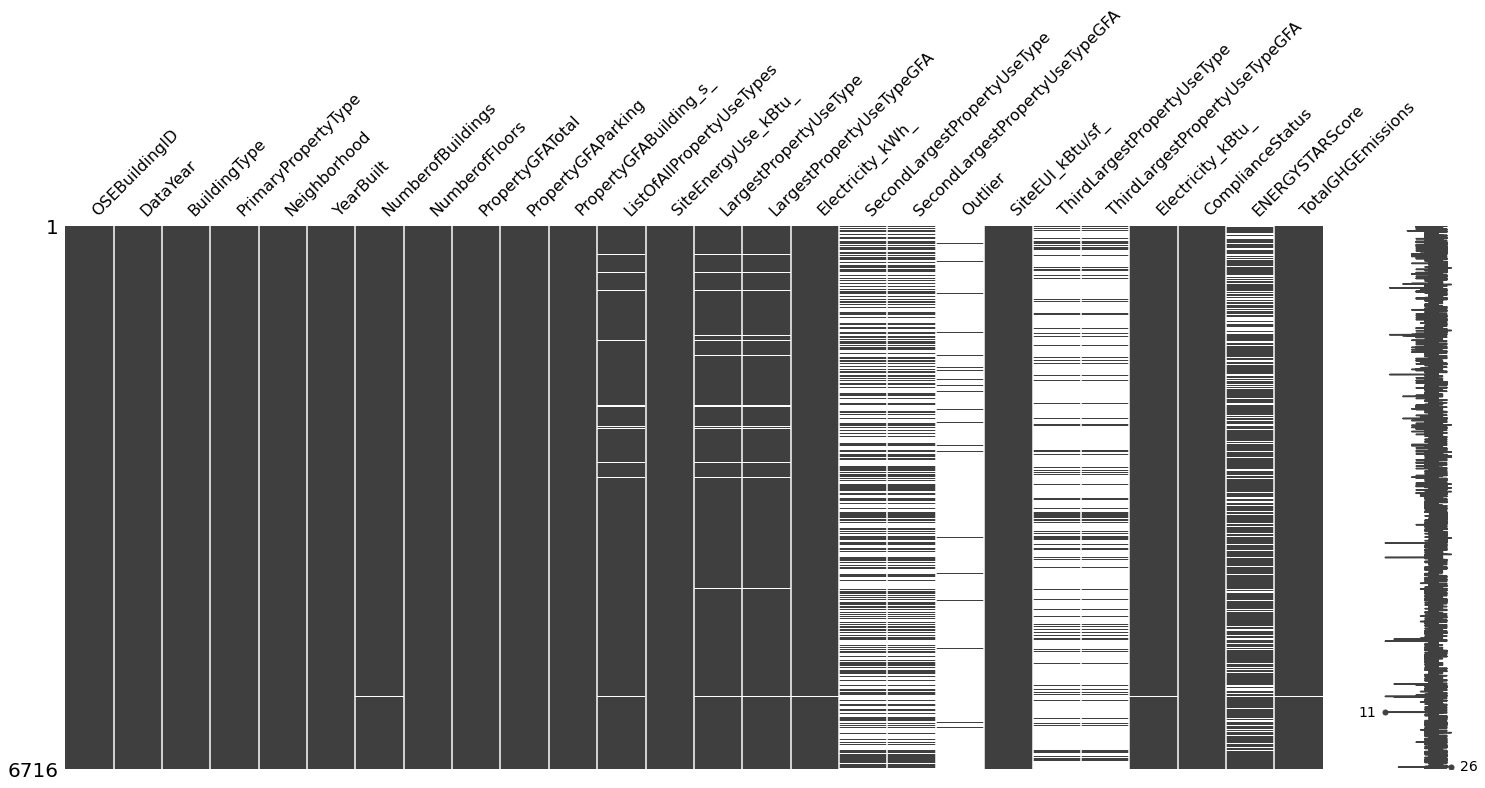

In [12]:
# Matrice représentant le taux de remplissage de chaque variable
import missingno as msno
msno.matrix(dataset)

In [13]:
# On effectue la moyenne des relevés des bâtiments dont la consommation a été mesurée en 2015 et en 2016
df = dataset[['OSEBuildingID','TotalGHGEmissions','SiteEnergyUse_kBtu_']].groupby('OSEBuildingID').mean().reset_index()

df = df.merge(dataset, how='left', on='OSEBuildingID').drop_duplicates('OSEBuildingID')
df

,OSEBuildingID,TotalGHGEmissions_x,SiteEnergyUse_kBtu__x,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding_s_,ListOfAllPropertyUseTypes,SiteEnergyUse_kBtu__y,LargestPropertyUseType,LargestPropertyUseTypeGFA,Electricity_kWh_,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,Outlier,SiteEUI_kBtu/sf_,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,Electricity_kBtu_,ComplianceStatus,ENERGYSTARScore,TotalGHGEmissions_y
0,1,249.705,7.103895e+06,2015,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,6.981428e+06,Hotel,88434.0,1.080307e+06,NaN,NaN,NaN,78.900000,NaN,NaN,3.686160e+06,Compliant,65.0,249.43
2,2,279.685,8.371084e+06,2015,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,"Hotel, Parking, Restaurant",8.354235e+06,Hotel,83880.0,1.144563e+06,Parking,15064.0,NaN,94.400000,Restaurant,4622.0,3.905411e+06,Compliant,51.0,263.51
4,3,2075.380,7.285884e+07,2015,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,961990,0,961990,"Hotel, Parking, Swimming Pool",7.313066e+07,Hotel,757243.0,1.458393e+07,Parking,100000.0,NaN,96.600000,Swimming Pool,0.0,4.976244e+07,Compliant,18.0,2061.48
6,5,1111.385,1.751195e+07,2015,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,2.822932e+07,Hotel,61320.0,8.115210e+05,NaN,NaN,High Outlier,460.400000,NaN,NaN,2.769023e+06,Compliant,1.0,1936.34
8,8,506.355,1.450085e+07,2015,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,"Hotel, Parking, Swimming Pool",1.482910e+07,Hotel,123445.0,1.777841e+06,Parking,68009.0,NaN,120.100000,Swimming Pool,0.0,6.066245e+06,Compliant,67.0,507.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,50222,20.940,8.497457e+05,2016,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,8.497457e+05,Office,12294.0,1.536550e+05,NaN,NaN,NaN,69.099998,NaN,NaN,5.242709e+05,Error - Correct Default Data,46.0,20.94
6712,50223,32.170,9.502762e+05,2016,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,9.502762e+05,Other - Recreation,16000.0,1.162210e+05,NaN,NaN,NaN,59.400002,NaN,NaN,3.965461e+05,Compliant,NaN,32.17
6713,50224,223.540,5.765898e+06,2016,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",5.765898e+06,Other - Recreation,7583.0,5.252517e+05,Fitness Center/Health Club/Gym,5574.0,NaN,438.200012,Swimming Pool,0.0,1.792159e+06,Compliant,NaN,223.54
6714,50225,22.110,7.194712e+05,2016,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,"Fitness Center/Health Club/Gym, Food Service, ...",7.194712e+05,Other - Recreation,6601.0,1.022480e+05,Fitness Center/Health Club/Gym,6501.0,NaN,51.000000,Pre-school/Daycare,484.0,3.488702e+05,Compliant,NaN,22.11


In [14]:
dataset = df

In [15]:
dataset.columns

Index(['OSEBuildingID', 'TotalGHGEmissions_x', 'SiteEnergyUse_kBtu__x',
       'DataYear', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding_s_',
       'ListOfAllPropertyUseTypes', 'SiteEnergyUse_kBtu__y',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'Electricity_kWh_', 'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA', 'Outlier', 'SiteEUI_kBtu/sf_',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'Electricity_kBtu_', 'ComplianceStatus', 'ENERGYSTARScore',
       'TotalGHGEmissions_y'],
      dtype='object')

## 3. Nettoyage des données

### 3.1 Sélection des variables pertinentes

On ne garde que les variables utiles pour la suite de l'analyse

In [16]:
dataset = dataset [['DataYear', 'BuildingType', 'PrimaryPropertyType', 'Neighborhood',
       'YearBuilt', 'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding_s_',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType',
       'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'ENERGYSTARScore','TotalGHGEmissions_x', 'SiteEnergyUse_kBtu__x']]

In [17]:
dataset.shape

(3432, 19)

### 3.2 Imputation des valeurs manquantes

In [18]:
# Echantillon de 50 entrées du dataset
dataset.sample(50)

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding_s_,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,TotalGHGEmissions_x,SiteEnergyUse_kBtu__x
714,2015,NonResidential,Small- and Mid-Sized Office,GREATER DUWAMISH,2008,1.0,3.0,76598,21410,55188,Office,55188.0,Parking,21410.0,NaN,NaN,76.0,134.690,4.476997e+06
1093,2015,NonResidential,Small- and Mid-Sized Office,LAKE UNION,2000,1.0,2.0,77174,25800,51374,Office,77174.0,NaN,NaN,NaN,NaN,1.0,90.755,9.092782e+06
1617,2015,Multifamily MR (5-9),Mid-Rise Multifamily,DOWNTOWN,2002,1.0,6.0,98222,37746,60476,Multifamily Housing,37924.0,Other,6443.0,NaN,NaN,81.0,48.270,2.018766e+06
2684,2015,Multifamily LR (1-4),Low-Rise Multifamily,MAGNOLIA / QUEEN ANNE,1985,1.0,4.0,22984,2390,20594,Multifamily Housing,25094.0,Parking,2390.0,NaN,NaN,61.0,4.420,6.334080e+05
1615,2015,Multifamily MR (5-9),Mid-Rise Multifamily,DOWNTOWN,1908,1.0,5.0,48786,0,48786,NaN,NaN,NaN,NaN,NaN,NaN,98.0,9.145,1.019040e+06
1225,2015,NonResidential,Mixed Use Property,NORTHEAST,2009,1.0,6.0,122400,54300,68100,Office,41624.0,Parking,33399.0,Multifamily Housing,20740.0,52.0,83.230,5.140495e+06
6037,2015,NonResidential,Small- and Mid-Sized Office,EAST,1920,1.0,3.0,23422,0,23422,Office,23422.0,NaN,NaN,NaN,NaN,64.0,127.495,2.699974e+06
3559,2015,Multifamily LR (1-4),Low-Rise Multifamily,SOUTHWEST,1960,1.0,3.0,22195,0,22195,Multifamily Housing,22195.0,NaN,NaN,NaN,NaN,78.0,4.035,5.787066e+05
5403,2015,NonResidential,Mixed Use Property,DOWNTOWN,1966,1.0,3.0,26000,0,26000,Office,13000.0,Other - Entertainment/Public Assembly,13000.0,NaN,NaN,NaN,36.205,1.370456e+06
393,2015,Nonresidential COS,Other,DOWNTOWN,1980,1.0,2.0,69400,0,69400,Other - Entertainment/Public Assembly,69400.0,NaN,NaN,NaN,NaN,NaN,303.455,1.525236e+07


On se rend compte qu'en ce qui concerne les usages secondaires et tertiaires des bâtiments, les valeurs manquantes correspondent en fait à une absence d'usage. On va donc remplacer les valeurs numériques manquantes par 0, celles catégorielles par "None"  

In [19]:
# Remplissage des valeurs manquantes
dataset.SecondLargestPropertyUseTypeGFA.fillna(0, inplace=True)
dataset.ThirdLargestPropertyUseTypeGFA.fillna(0, inplace=True)
dataset.SecondLargestPropertyUseType.fillna('None', inplace=True)
dataset.ThirdLargestPropertyUseType.fillna('None', inplace=True)

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/pandas/core/generic.py:6383: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [20]:
# Imputation des valeurs manquantes par le module KNNImputer
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=5)
dataset[['LargestPropertyUseTypeGFA', 'SecondLargestPropertyUseTypeGFA','SiteEnergyUse_kBtu__x', 'ENERGYSTARScore','TotalGHGEmissions_x'  ]]=pd.DataFrame(imputer.fit_transform(dataset[[ 'LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA', 'SiteEnergyUse_kBtu__x', 'ENERGYSTARScore','TotalGHGEmissions_x'  ]]))

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/pandas/core/frame.py:3636: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


### 3.3 Filtrage des valeurs aberrantes 

On filtre ici les valeurs qu'on juge aberrantes afin d'améliorer l'apprentissage de notre modèle

<AxesSubplot:xlabel='SiteEnergyUse_kBtu__x', ylabel='TotalGHGEmissions_x'>

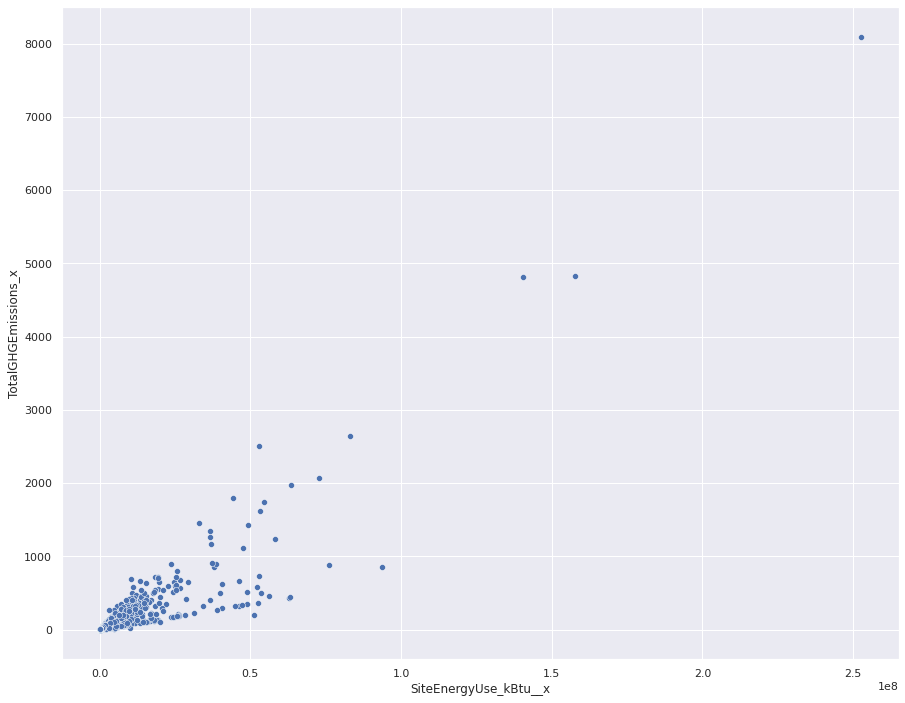

In [23]:
# Exploration des deux variables cibles  
sns.set(rc={'figure.figsize':(15,12)})

sns.scatterplot(x='SiteEnergyUse_kBtu__x', y='TotalGHGEmissions_x', data=dataset)

L'on se rend compte que les données contiennent nombre d'outliers. Il n'est certes pas très prudent de tous les filtrer mais les garder pourrait affecter l'efficacité de notre modèle. On prendra donc garde à en filtrer le minimum possible.

In [24]:
dataset.SiteEnergyUse_kBtu__x.sort_values(ascending=False)

124     2.525121e+08
3287    1.576065e+08
168     1.405294e+08
585     9.374886e+07
50      8.291358e+07
            ...     
4543    1.697945e+04
4541    1.697945e+04
4539    1.697945e+04
4537    1.697945e+04
6715    1.697945e+04
Name: SiteEnergyUse_kBtu__x, Length: 3432, dtype: float64

In [25]:
# On choisit de filtrer la valeur maximum de SiteEnergyUse_kBtu__x
dataset = dataset.loc[(dataset.SiteEnergyUse_kBtu__x!=dataset.SiteEnergyUse_kBtu__x.max())]
dataset

,DataYear,BuildingType,PrimaryPropertyType,Neighborhood,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding_s_,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,ENERGYSTARScore,TotalGHGEmissions_x,SiteEnergyUse_kBtu__x
0,2015,NonResidential,Hotel,DOWNTOWN,1927,1.0,12.0,88434,0,88434,Hotel,88434.0,None,0.0,None,0.0,65.0,249.705,7.103895e+06
2,2015,NonResidential,Hotel,DOWNTOWN,1996,1.0,11.0,103566,15064,88502,Hotel,757243.0,Parking,100000.0,Restaurant,4622.0,18.0,2075.380,7.285884e+07
4,2015,NonResidential,Hotel,DOWNTOWN,1969,1.0,41.0,961990,0,961990,Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,67.0,506.355,1.450085e+07
6,2015,NonResidential,Hotel,DOWNTOWN,1926,1.0,10.0,61320,0,61320,Hotel,81352.0,None,0.0,None,0.0,25.0,192.300,6.005818e+06
8,2015,NonResidential,Hotel,DOWNTOWN,1980,1.0,18.0,119890,12460,107430,Hotel,163984.0,Parking,0.0,Swimming Pool,0.0,46.0,361.885,1.317878e+07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6711,2016,Nonresidential COS,Office,GREATER DUWAMISH,1990,1.0,1.0,12294,0,12294,Office,21600.0,None,0.0,None,0.0,100.0,3.695,1.697945e+04
6712,2016,Nonresidential COS,Other,DOWNTOWN,2004,1.0,1.0,16000,0,16000,Other - Recreation,21600.0,None,0.0,None,0.0,100.0,3.695,1.697945e+04
6713,2016,Nonresidential COS,Other,MAGNOLIA / QUEEN ANNE,1974,1.0,1.0,13157,0,13157,Other - Recreation,21600.0,Fitness Center/Health Club/Gym,0.0,Swimming Pool,0.0,100.0,3.695,1.697945e+04
6714,2016,Nonresidential COS,Mixed Use Property,GREATER DUWAMISH,1989,1.0,1.0,14101,0,14101,Other - Recreation,21600.0,Fitness Center/Health Club/Gym,0.0,Pre-school/Daycare,484.0,100.0,3.695,1.697945e+04


In [27]:
# Filtrage des valeurs négatives car aberrantes
for x in num_feat:
    dataset = dataset.loc[dataset[x]>=0]

In [28]:
dataset.shape

(3427, 19)

<AxesSubplot:>

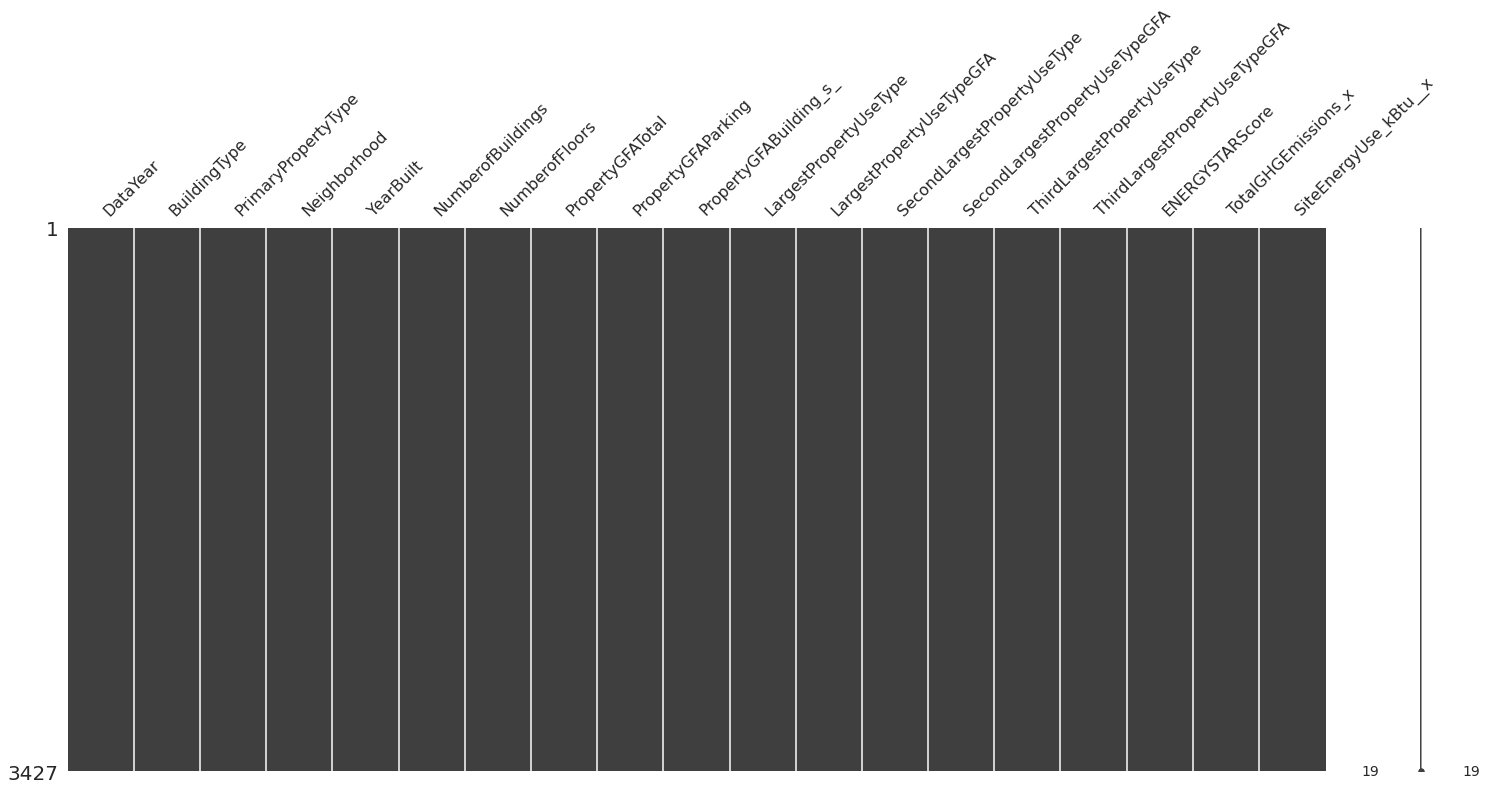

In [29]:
msno.matrix(dataset)

### 3.4 Traitement des variables catégorielles

On regroupe les sous-catégories qui correspondent à la même chose (redondances) ou plus ou moins afin de diminuer 
la variance de nos features.
En ce qui concerne les sous-catégories restantes (celles dont le nombre est jugé petit), on les regroupera sous "Diverse".

On ne prendra pas en compte 'LargestPropertyUseType' qui donne les mêmes infos que 'PrimaryPropertyType'.

In [30]:
dataset.loc[dataset.BuildingType=='Nonresidential WA', 'BuildingType'] = 'Nonresidential'
dataset.loc[dataset.BuildingType=='Nonresidential COS', 'BuildingType'] = 'Nonresidential'
dataset.loc[dataset.BuildingType=='NonResidential', 'BuildingType'] = 'Nonresidential'

In [31]:
dataset.loc[dataset.Neighborhood=='Central', 'Neighborhood']='CENTRAL'
dataset.loc[dataset.Neighborhood=='Delridge', 'Neighborhood']='DELRIDGE'
dataset.loc[dataset.Neighborhood=='DELRIDGE NEIGHBORHOODS', 'Neighborhood']='DELRIDGE'
dataset.loc[dataset.Neighborhood=='Ballard', 'Neighborhood']='BALLARD'
dataset.loc[dataset.Neighborhood=='North', 'Neighborhood']='NORTH'
dataset.loc[dataset.Neighborhood=='Northwest', 'Neighborhood']='NORTHWEST'

In [32]:
dataset.loc[dataset.PrimaryPropertyType == 'Residence Hall/Dormitory', 'PrimaryPropertyType']='Residence Hall'
dataset.loc[dataset.PrimaryPropertyType == 'Refrigerated Warehouse', 'PrimaryPropertyType']='Warehouse'
dataset.loc[dataset.PrimaryPropertyType == 'Non-Refrigerated Warehouse', 'PrimaryPropertyType']='Warehouse'
dataset.loc[dataset.PrimaryPropertyType == 'Restaurant\n', 'PrimaryPropertyType']='Restaurant'
dataset.loc[dataset.PrimaryPropertyType == 'Distribution Center\n', 'PrimaryPropertyType']='Supermarket / Grocery Store'
dataset.loc[dataset.PrimaryPropertyType == 'College/University', 'PrimaryPropertyType']='University'
dataset.loc[dataset.PrimaryPropertyType == 'Small- and Mid-Sized Office', 'PrimaryPropertyType']='Office'
dataset.loc[dataset.PrimaryPropertyType == 'Large Office', 'PrimaryPropertyType']='Office'
dataset.loc[dataset.PrimaryPropertyType == 'Self-Storage Facility\n', 'PrimaryPropertyType']='Warehouse'
dataset.loc[dataset.PrimaryPropertyType == 'Supermarket/Grocery Store', 'PrimaryPropertyType']='Supermarket / Grocery Store'
dataset.loc[dataset.PrimaryPropertyType == 'Medical Office', 'PrimaryPropertyType']='Office'
dataset.loc[dataset.PrimaryPropertyType == 'Distribution Center', 'PrimaryPropertyType']='Warehouse'
dataset.loc[dataset.PrimaryPropertyType == 'SPS-District K-12', 'PrimaryPropertyType']='K-12 School'
dataset.loc[dataset.PrimaryPropertyType == 'Laboratory', 'PrimaryPropertyType']='Other'
dataset.loc[dataset.PrimaryPropertyType == 'Self-Storage Facility', 'PrimaryPropertyType']='Other'

In [33]:
for x in dataset.SecondLargestPropertyUseType:    
    if 'Office' in x:
        dataset.loc[dataset.SecondLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Office'
    elif 'Other' in x:
        dataset.loc[dataset.SecondLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Other'
    elif 'Restaurant' in x:
        dataset.loc[dataset.SecondLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Restaurant'
    elif 'Store' in x:
        dataset.loc[dataset.SecondLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Store'
    elif 'Service' in x:
        dataset.loc[dataset.SecondLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Services'


In [34]:
for x in dataset.ThirdLargestPropertyUseType:    
    if 'Office' in x:
        dataset.loc[dataset.ThirdLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Office'
    elif 'Other' in x:
        dataset.loc[dataset.ThirdLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Other'
    elif 'Restaurant' in x:
        dataset.loc[dataset.ThirdLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Restaurant'
    elif 'Store' in x:
        dataset.loc[dataset.ThirdLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Store'
    elif 'Service' in x:
        dataset.loc[dataset.ThirdLargestPropertyUseType==x, 'SecondLargestPropertyUseType'] = 'Services'


## 4. Création de variables

La création de variables devrait nous permettre d'améliorer l'apprentissage de notre modèle

In [35]:
# Création de la variable GFA_per_floor qui représente la surface par étage
dataset['GFA_per_floor']=(dataset['PropertyGFABuilding_s_'])/(dataset['NumberofFloors']+1)
dataset['GFA_per_floor']

0        6802.615385
2        7375.166667
4       22904.523810
6        5574.545455
8        5654.210526
            ...     
6711     6147.000000
6712     8000.000000
6713     6578.500000
6714     7050.500000
6715     9129.000000
Name: GFA_per_floor, Length: 3427, dtype: float64

In [36]:
# La variable 'Old' correspond à l'âge du bâtiment
dataset['Old']=dataset['DataYear']- dataset['YearBuilt']

In [37]:
# Parking_ratio au ratio parking/surface totale
dataset['Parking_ratio'] = dataset['PropertyGFAParking']/dataset['PropertyGFATotal']

## 5. Exploration des données

### 5.1 Analyse univariée

#### 5.1.1 Analyse des variables cibles

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 2404022.34 and sigma = 7386158.06



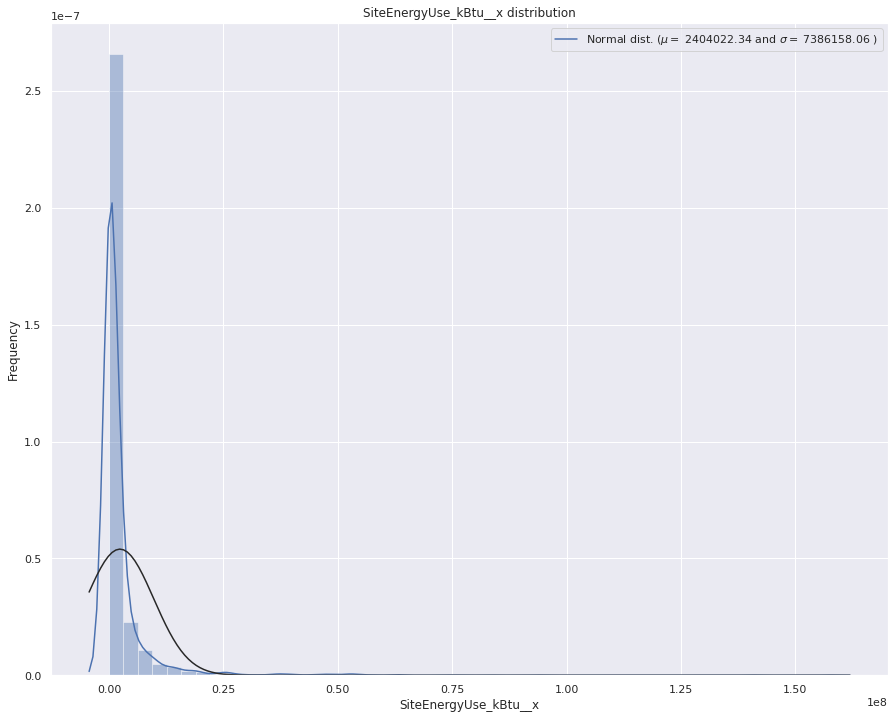

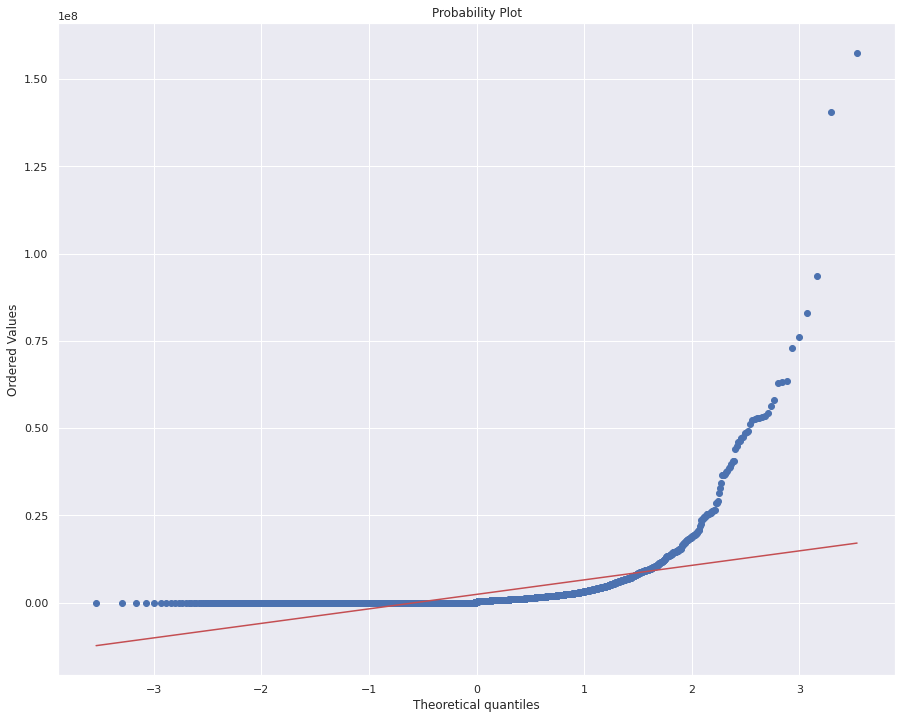

In [39]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(dataset['SiteEnergyUse_kBtu__x'] , fit=norm, kde=True);

(mu, sigma) = norm.fit(dataset['SiteEnergyUse_kBtu__x'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))

plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('SiteEnergyUse_kBtu__x distribution')

fig = plt.figure()
res = stats.probplot(dataset['SiteEnergyUse_kBtu__x'], plot=plt)
plt.show()

/home/jo/miniconda3/envs/johnny_lerouge/lib/python3.8/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)



 mu = 51.89 and sigma = 185.51



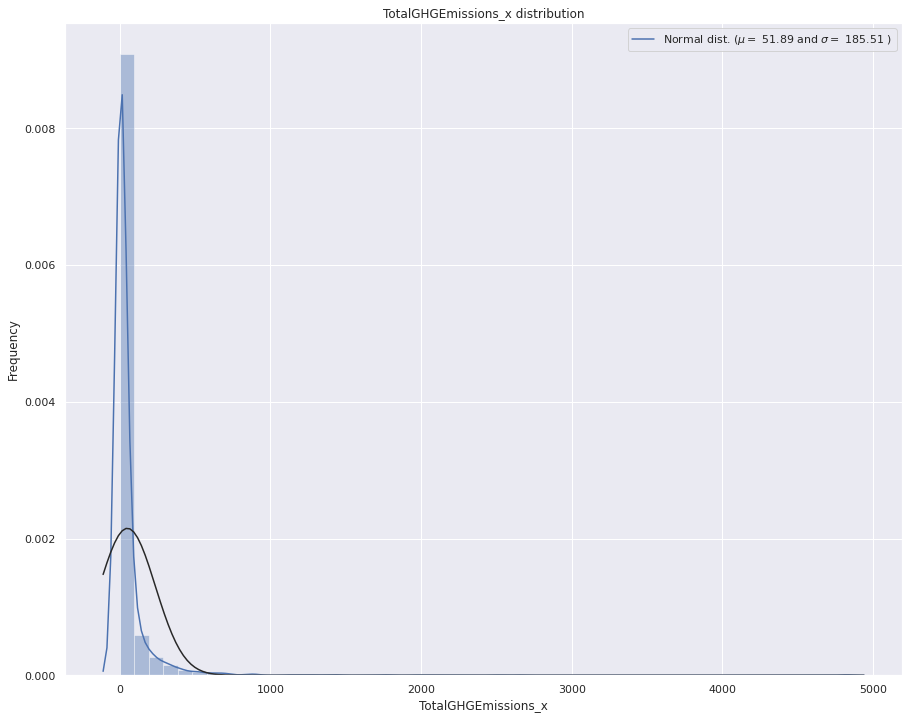

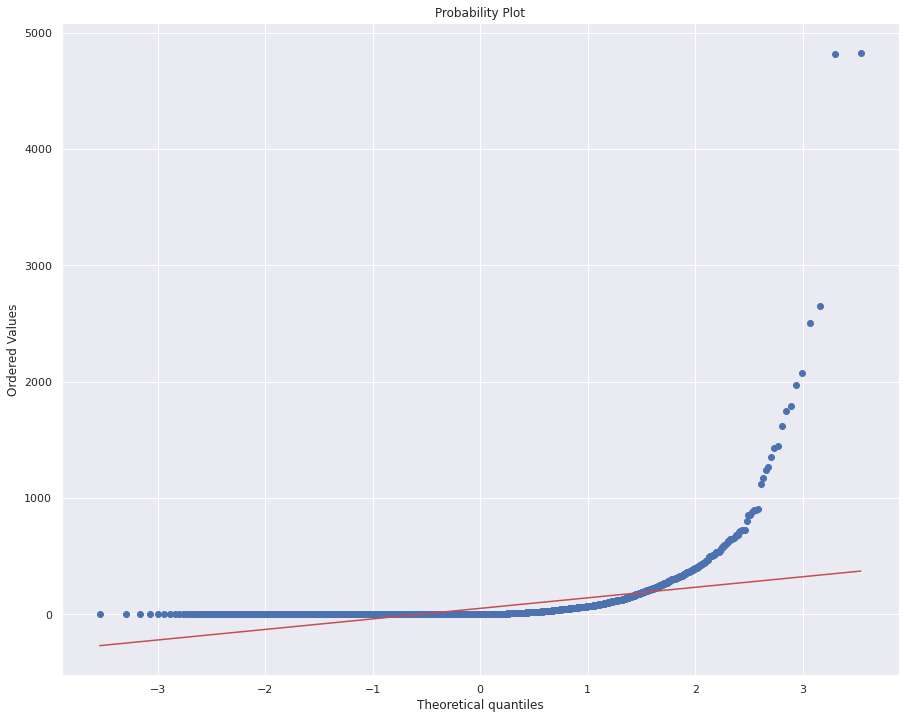

In [40]:
sns.distplot(dataset['TotalGHGEmissions_x'] , fit=norm);

(mu, sigma) = norm.fit(dataset['TotalGHGEmissions_x'])
print( '\n mu = {:.2f} and sigma = {:.2f}\n'.format(mu, sigma))


plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)],
            loc='best')
plt.ylabel('Frequency')
plt.title('TotalGHGEmissions_x distribution')


fig = plt.figure()
res = stats.probplot(dataset['TotalGHGEmissions_x'], plot=plt)
plt.show()

On déduit des graphes que les variables cibles ne repectent pas une distribution normale. Une transformation en log est donc à considérer.

#### 5.1.2 Analyse des features

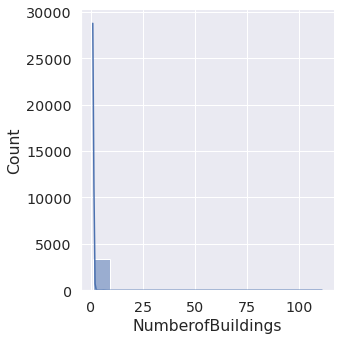

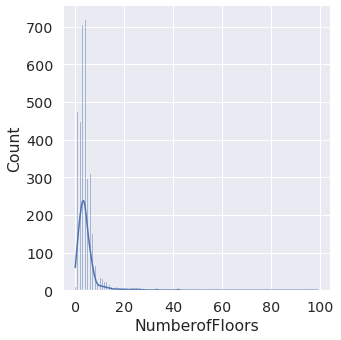

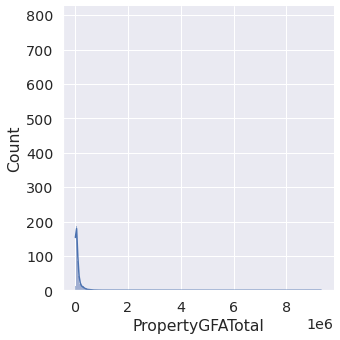

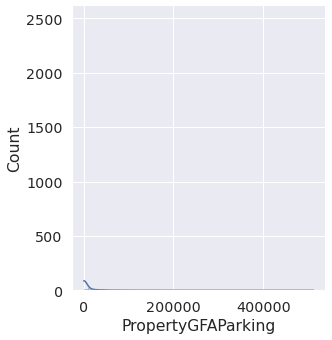

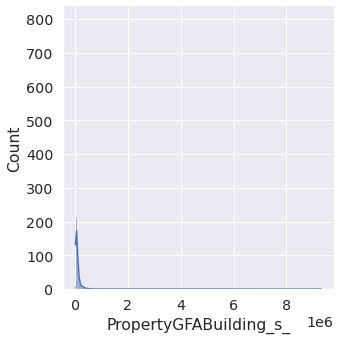

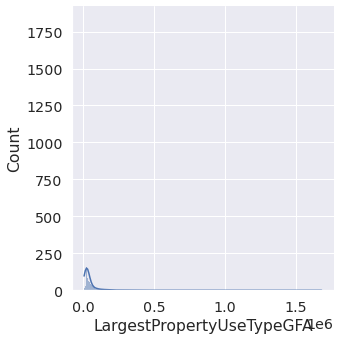

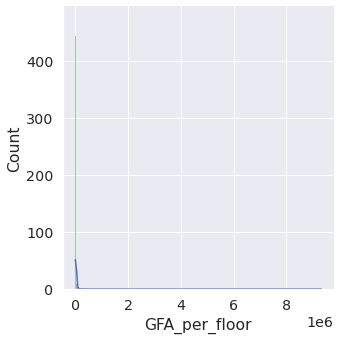

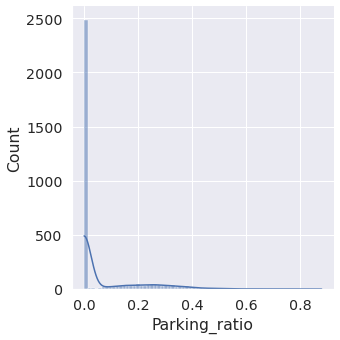

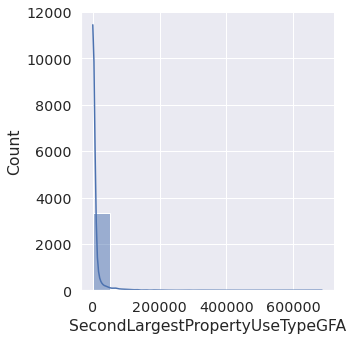

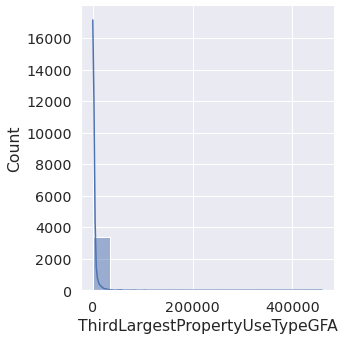

In [72]:
for x in dataset[['NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFAParking', 'PropertyGFABuilding_s_', 
       'LargestPropertyUseTypeGFA', 'GFA_per_floor', 'Parking_ratio',
       'SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA']]:
    sns.displot(data=dataset, x=x, kde=True)

### 5.2 Analyse bivariée

L'analyse bivariée nous permettra de voir les plus fortes corrélations linéaires entre nos variables numériques 

<AxesSubplot:>

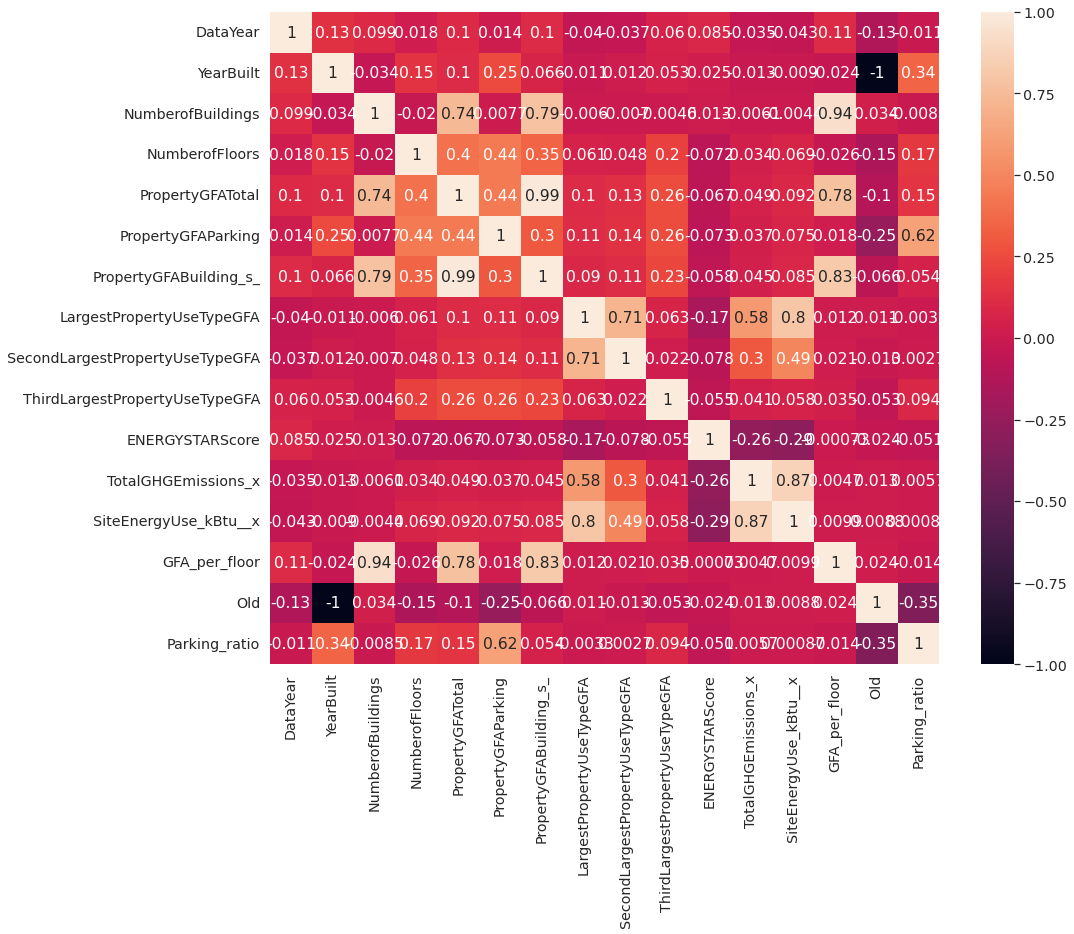

In [70]:
sns.set(rc={'figure.figsize':(15,12)}, font_scale = 1.3)

sns.heatmap(dataset.corr(),vmin=-1, vmax=1, annot=True)

Forte corrélation entre LargestPropertyUseGFA et les variables cibles

In [69]:
# Consommation moyenne d'électricité par type de bâtiments
dataset.groupby('PrimaryPropertyType')['SiteEnergyUse_kBtu__x'].mean().sort_values(ascending=False)

PrimaryPropertyType
Hospital                       8.919025e+06
Hotel                          8.483614e+06
K-12 School                    6.973393e+06
Office                         3.845397e+06
University                     3.681838e+06
Other                          2.981269e+06
Supermarket / Grocery Store    2.510033e+06
Residence Hall                 2.353948e+06
Mixed Use Property             2.346699e+06
Warehouse                      2.325852e+06
Retail Store                   2.060319e+06
Senior Care Community          1.774603e+06
Worship Facility               1.672339e+06
Low-Rise Multifamily           1.320428e+06
Mid-Rise Multifamily           1.168118e+06
High-Rise Multifamily          9.069830e+05
Restaurant                     5.227079e+05
Name: SiteEnergyUse_kBtu__x, dtype: float64

On voit que les hôtels, les hopitaux ainsi que les écoles ont en moyenne une consommation d'électricité assez nettement supérieure aux autres types de bâtiments. La distribution en boxplot de la variable SiteEnergyUse_kBtu__x selon l'usage primaire des bâtiments nous confirmera cela.

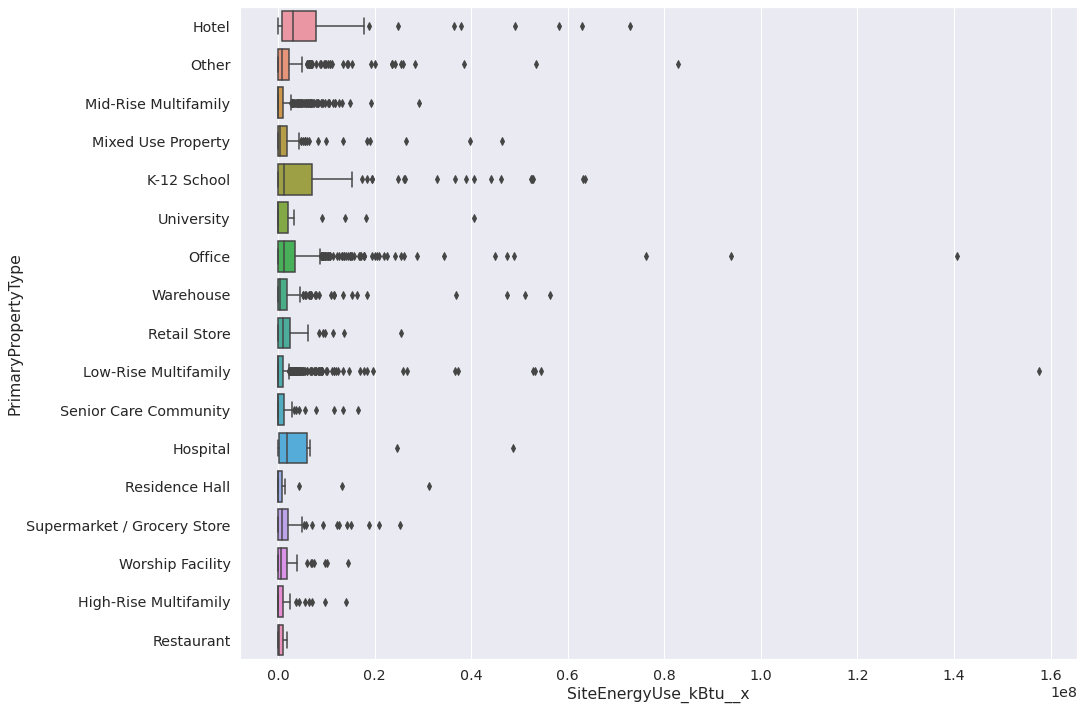

In [44]:
# Consommation d'électricité selon l'usage primaire des bâtiments
sns.set(rc={'figure.figsize':(15,12)}, font_scale = 1.3)
ax = sns.boxplot(data=dataset, x='SiteEnergyUse_kBtu__x', y='PrimaryPropertyType', orient='h')

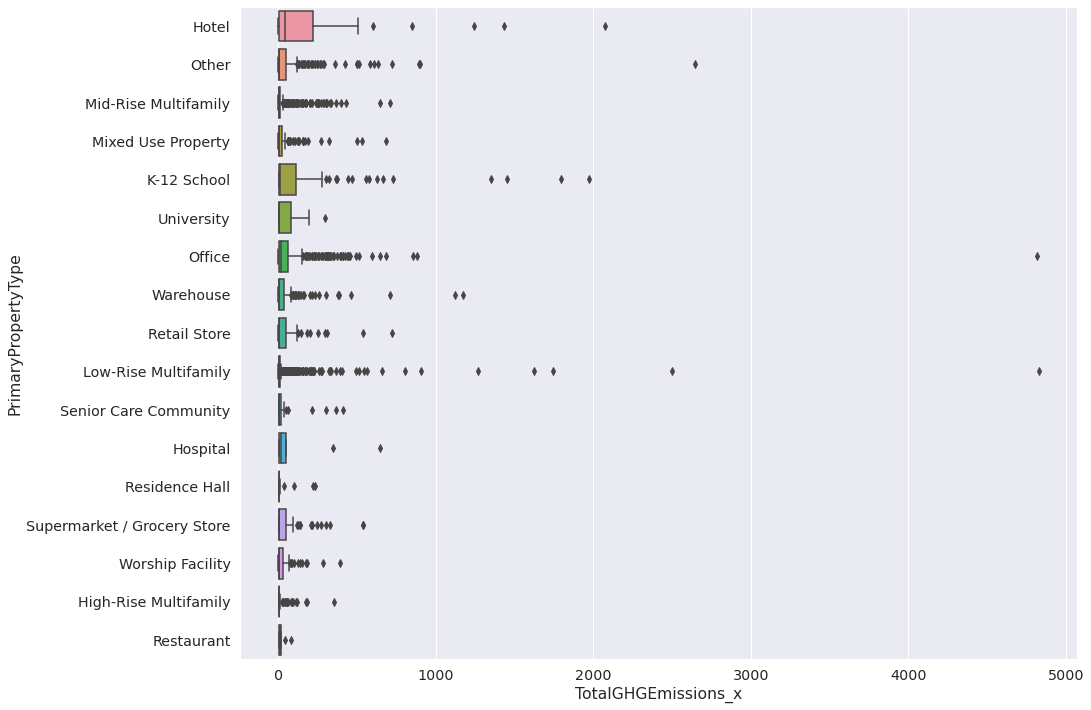

In [71]:
# Emissions de CO2 selon l'usage primaire des bâtiments
sns.set(rc={'figure.figsize':(15,12)}, font_scale = 1.3)
ax = sns.boxplot(data=dataset, x='TotalGHGEmissions_x', y='PrimaryPropertyType', orient='h')

In [45]:
dataset.to_csv('dataset.csv', index=False)